  # DATA PREPOSSECING FOR REAL ESTATE SALES DATASET


 # PROBLEM STATEMENT

The real estate market plays a crucial role in the economy, with property prices being influenced by numerous factors such as location, property size, amenities, and market trends. Accurately predicting real estate prices is essential for buyers, sellers, investors, and policymakers. This project aims to develop a predictive model for real estate sales prices using a comprehensive dataset of past transactions, property features, and market conditions. Various regression models will be implemented and evaluated to determine the best-performing model for price prediction.

 # PROBLEM DESCRIPTION

The dataset consists of historical real estate sales data, including property characteristics, transaction details, and geographical information. Predicting real estate prices is challenging due to the complex relationships among various factors that influence pricing. The project will explore these relationships and apply different regression techniques to build an accurate prediction model.

 # PROJECT OBJECTIVES

To develop a predictive model for real estate sales prices.

To identify the key factors that significantly impact property prices.

To evaluate multiple regression models and select the most accurate one.

To provide insights and recommendations for buyers, sellers, and real estate professionals.

# DATASET CHARACTERISTICS

Type: Regression

Features: Multiple attributes including property size, location, number of rooms, amenities, and market conditions.

Target Variable: Sale Price (in USD or local currency)

Source: Public real estate transaction databases or proprietary sources

This project will utilize machine learning techniques to analyze and predict real estate prices, ultimately aiding decision-making in the housing market.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression


import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

import sqlite3





# Load dataset

In [3]:
file_path = "C:/Users/czone/Downloads/Real_Estate_Sales_2001-2022_GL.csv"
data = pd.read_csv(file_path, low_memory=False)




# Display basic info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


# Check for missing values

In [5]:
print("Missing values:")
print(data.isnull().sum())


Missing values:
Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     398389
Non Use Code         784178
Assessor Remarks     926401
OPM remarks         1084598
Location             799518
dtype: int64


# Handle missing values

In [7]:
data = data.dropna()

# Encoding categorical variables

In [12]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scaling numerical variables

In [14]:
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


# Correlation analysis

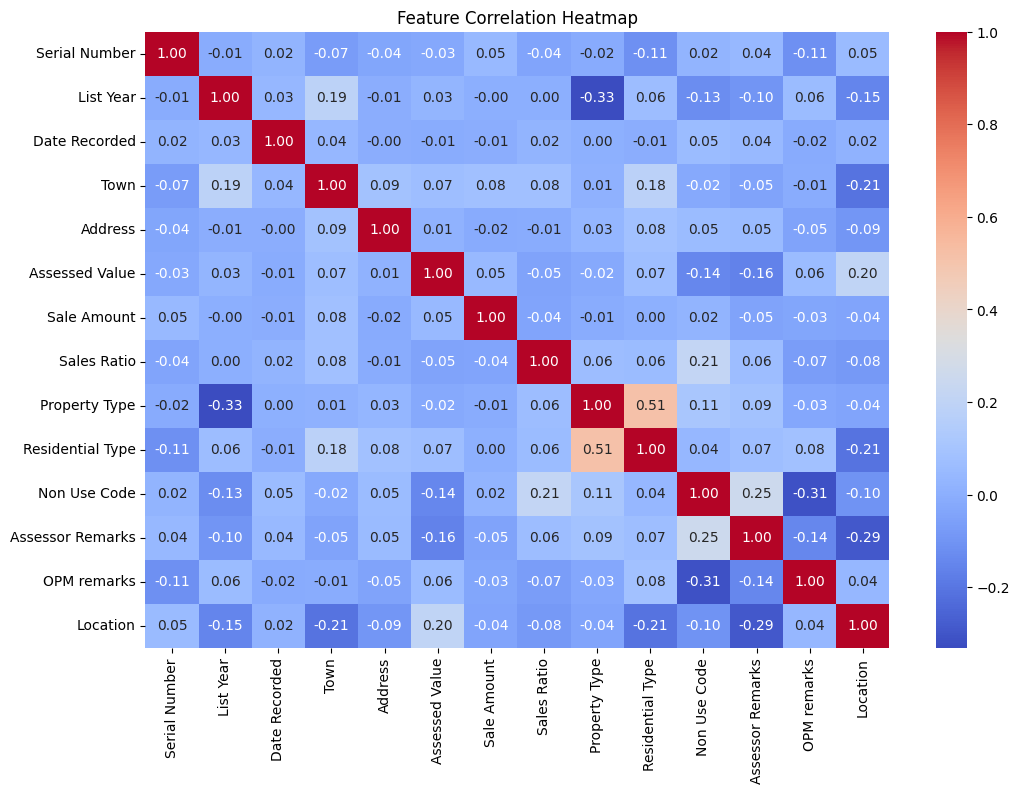

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
print(data.columns)


Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')


# Compute correlation with target variable

In [22]:
target_col = 'Sale Amount'  
correlations = data.corr()[target_col].abs().sort_values(ascending=False)
print("Feature correlations with target:")
print(correlations)

Feature correlations with target:
Sale Amount         1.000000
Town                0.078606
Assessed Value      0.048048
Assessor Remarks    0.047338
Serial Number       0.045386
Location            0.042614
Sales Ratio         0.040326
OPM remarks         0.034548
Non Use Code        0.022642
Address             0.015892
Property Type       0.012783
Date Recorded       0.006683
Residential Type    0.004983
List Year           0.001362
Name: Sale Amount, dtype: float64


# Select top K features using SelectKBest

In [24]:
k = 10  # Choose the top 10 features
X = data.drop(columns=[target_col])
y = data[target_col]
k_best = SelectKBest(score_func=f_regression, k=k)
X_selected = k_best.fit_transform(X, y)
selected_features = X.columns[k_best.get_support()]
print(f"Selected {k} best features:", selected_features)

Selected 10 best features: Index(['Serial Number', 'Town', 'Address', 'Assessed Value', 'Sales Ratio',
       'Property Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')


# EDA - Univariate Analysis

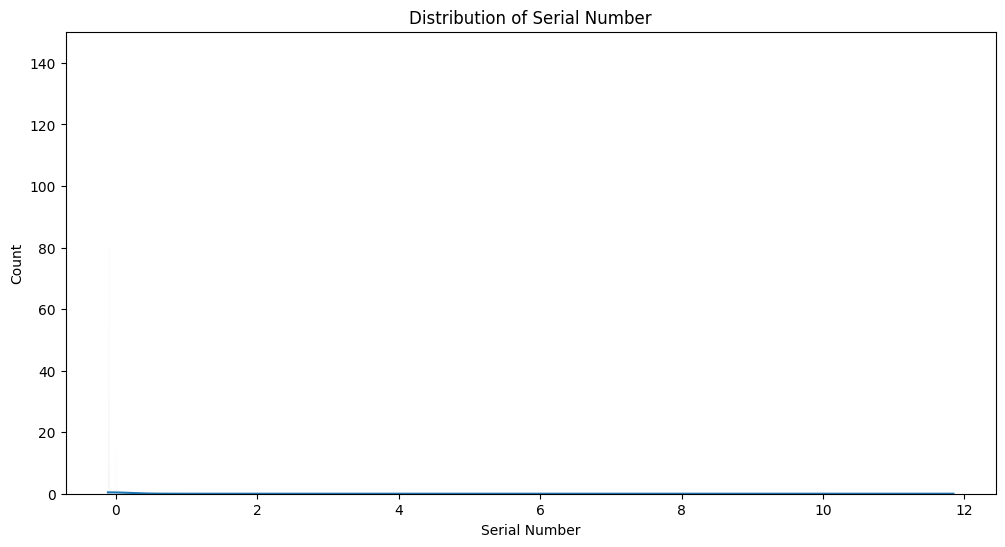

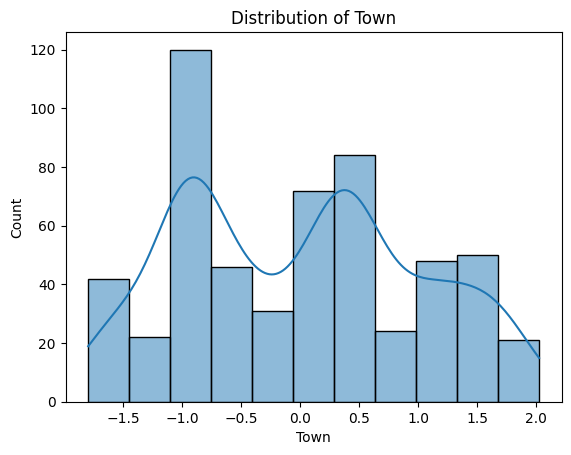

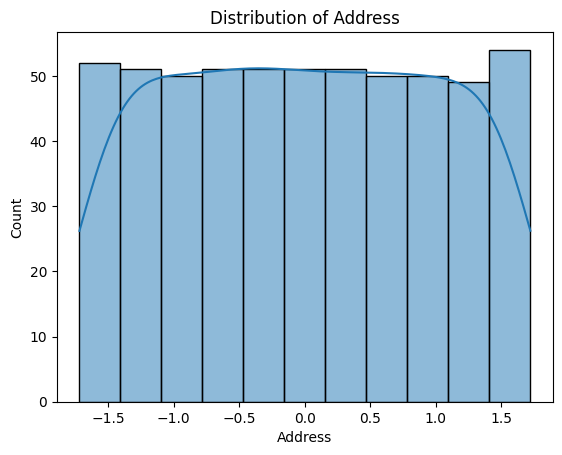

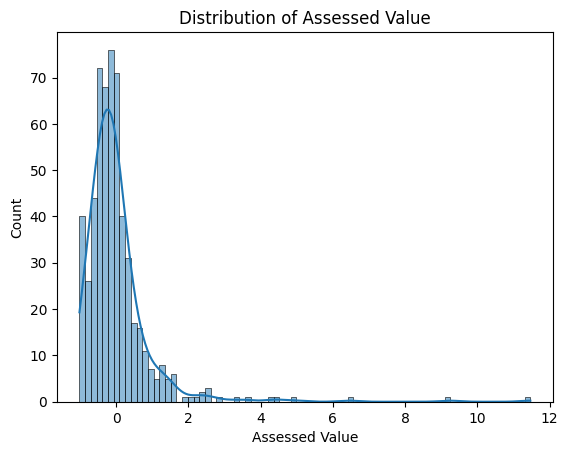

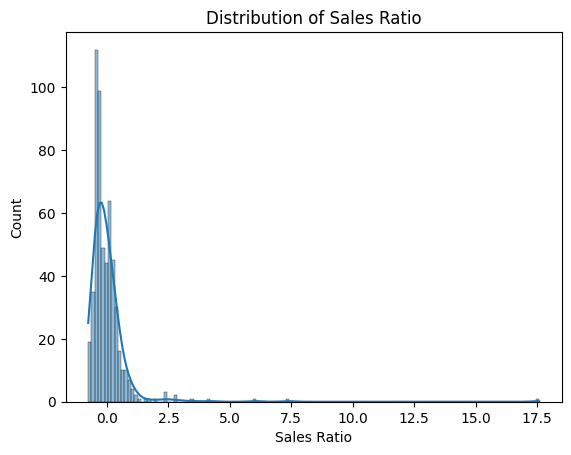

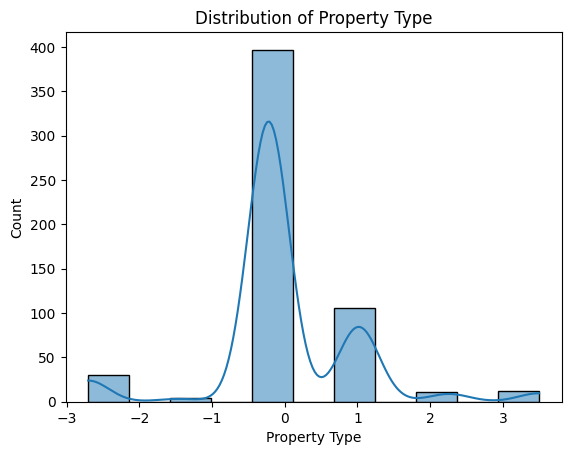

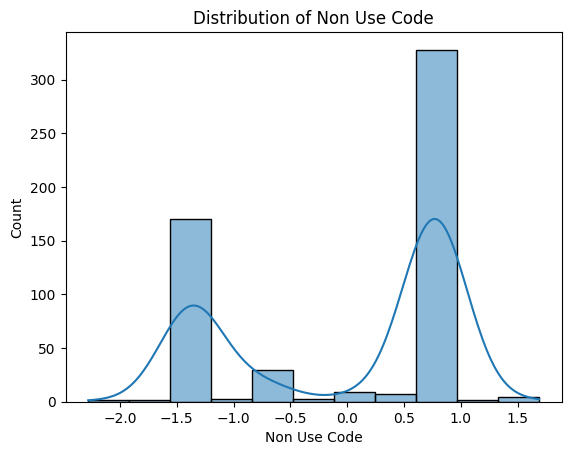

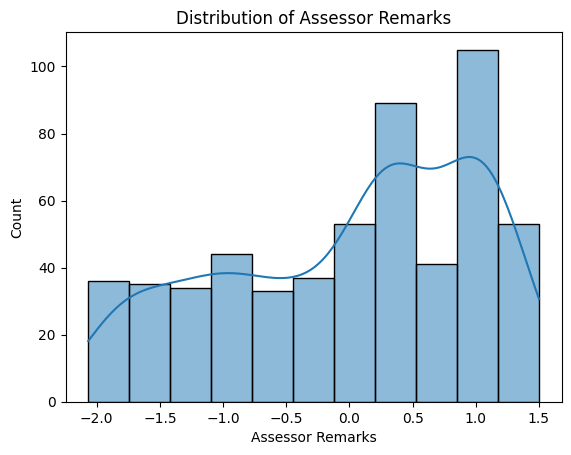

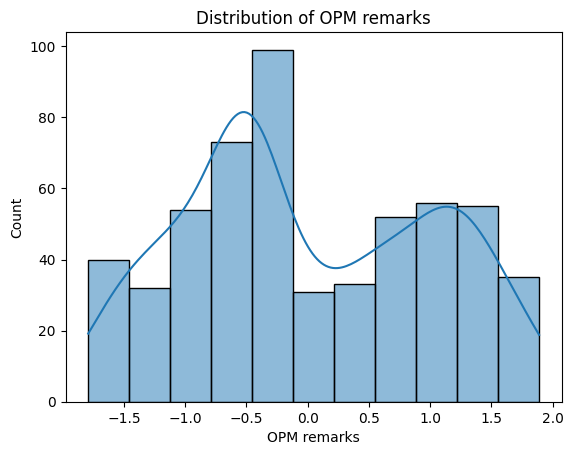

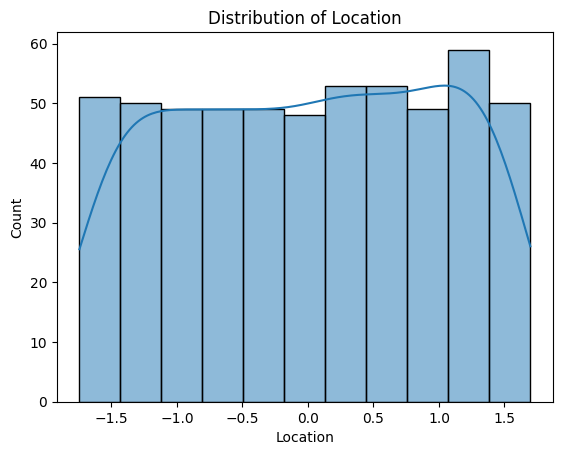

In [26]:
plt.figure(figsize=(12, 6))
for col in selected_features:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Bivariate Analysis

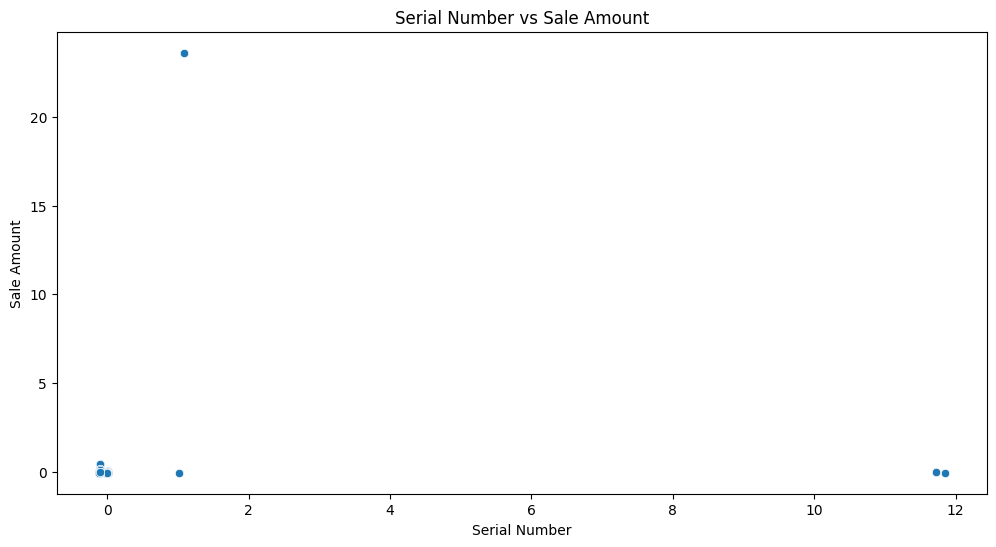

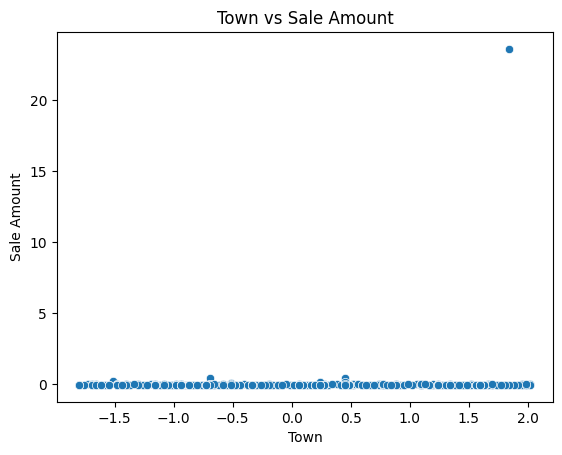

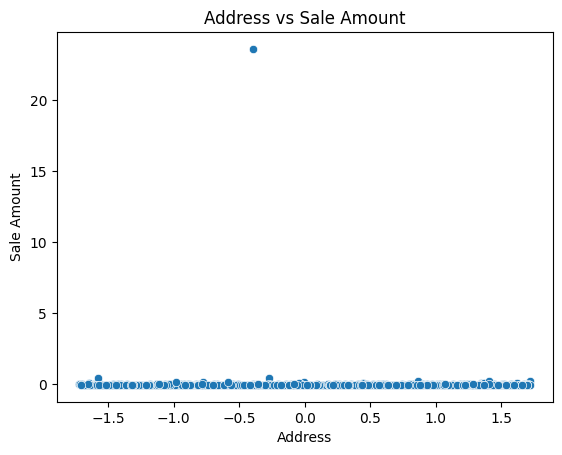

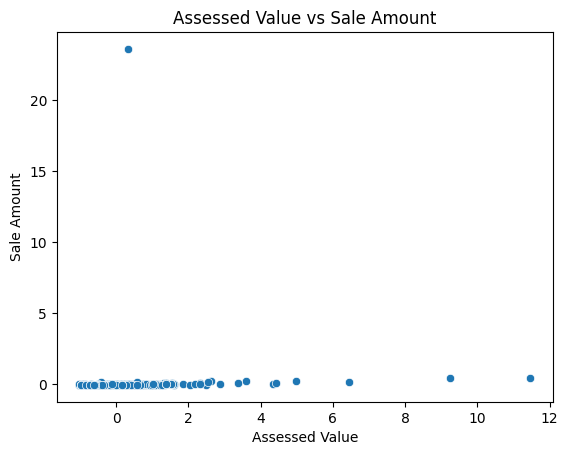

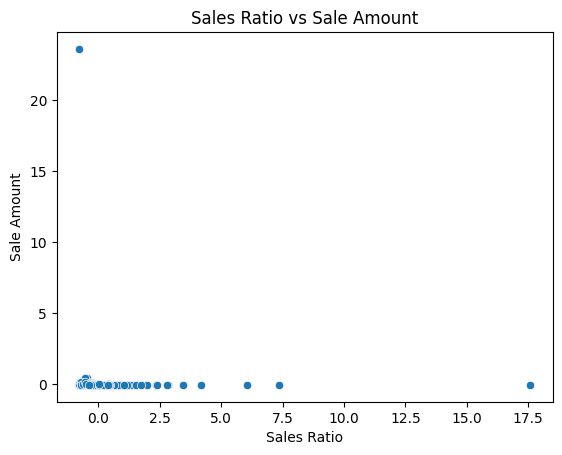

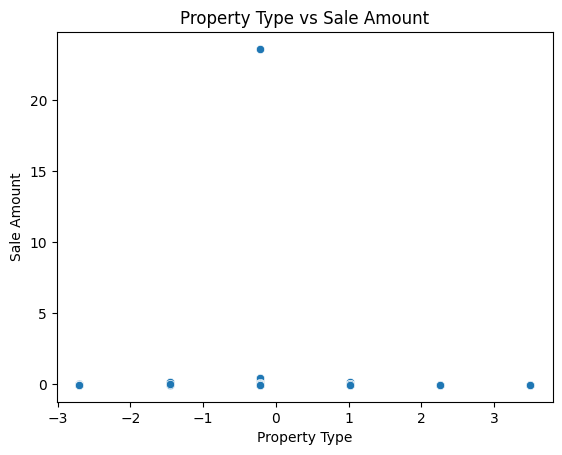

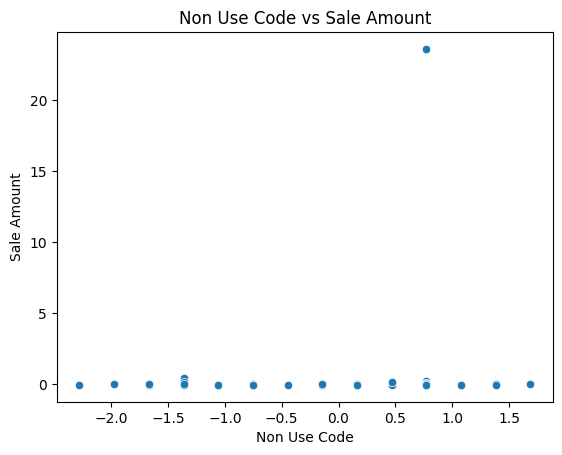

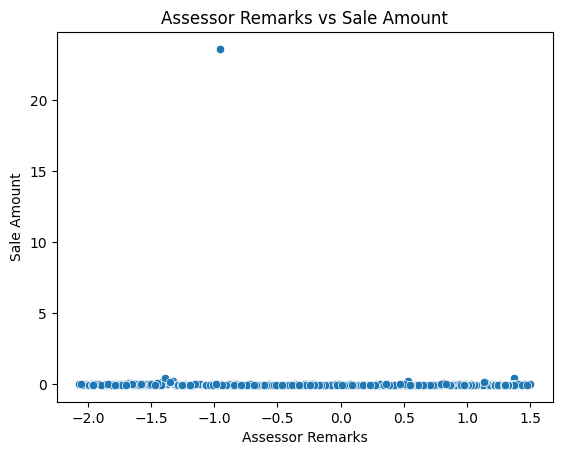

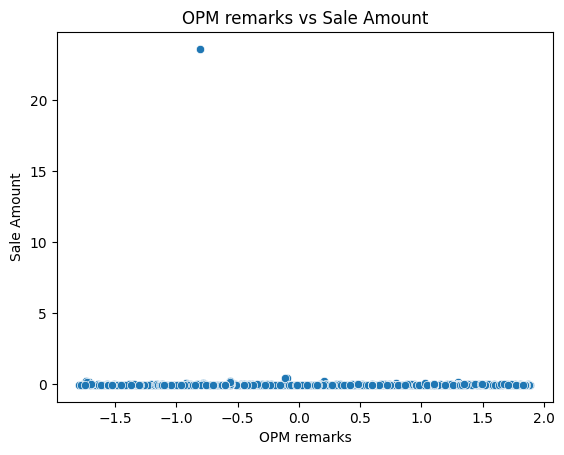

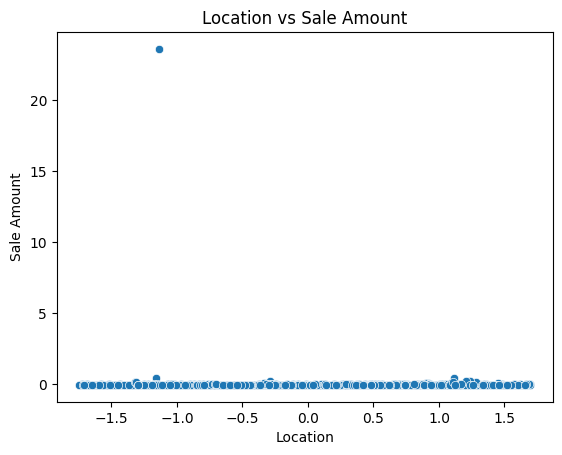

In [27]:
plt.figure(figsize=(12, 6))
for col in selected_features:
    sns.scatterplot(x=data[col], y=data[target_col])
    plt.title(f"{col} vs {target_col}")
    plt.show()

# EDA - Multivariate Analysis (Pairplot)

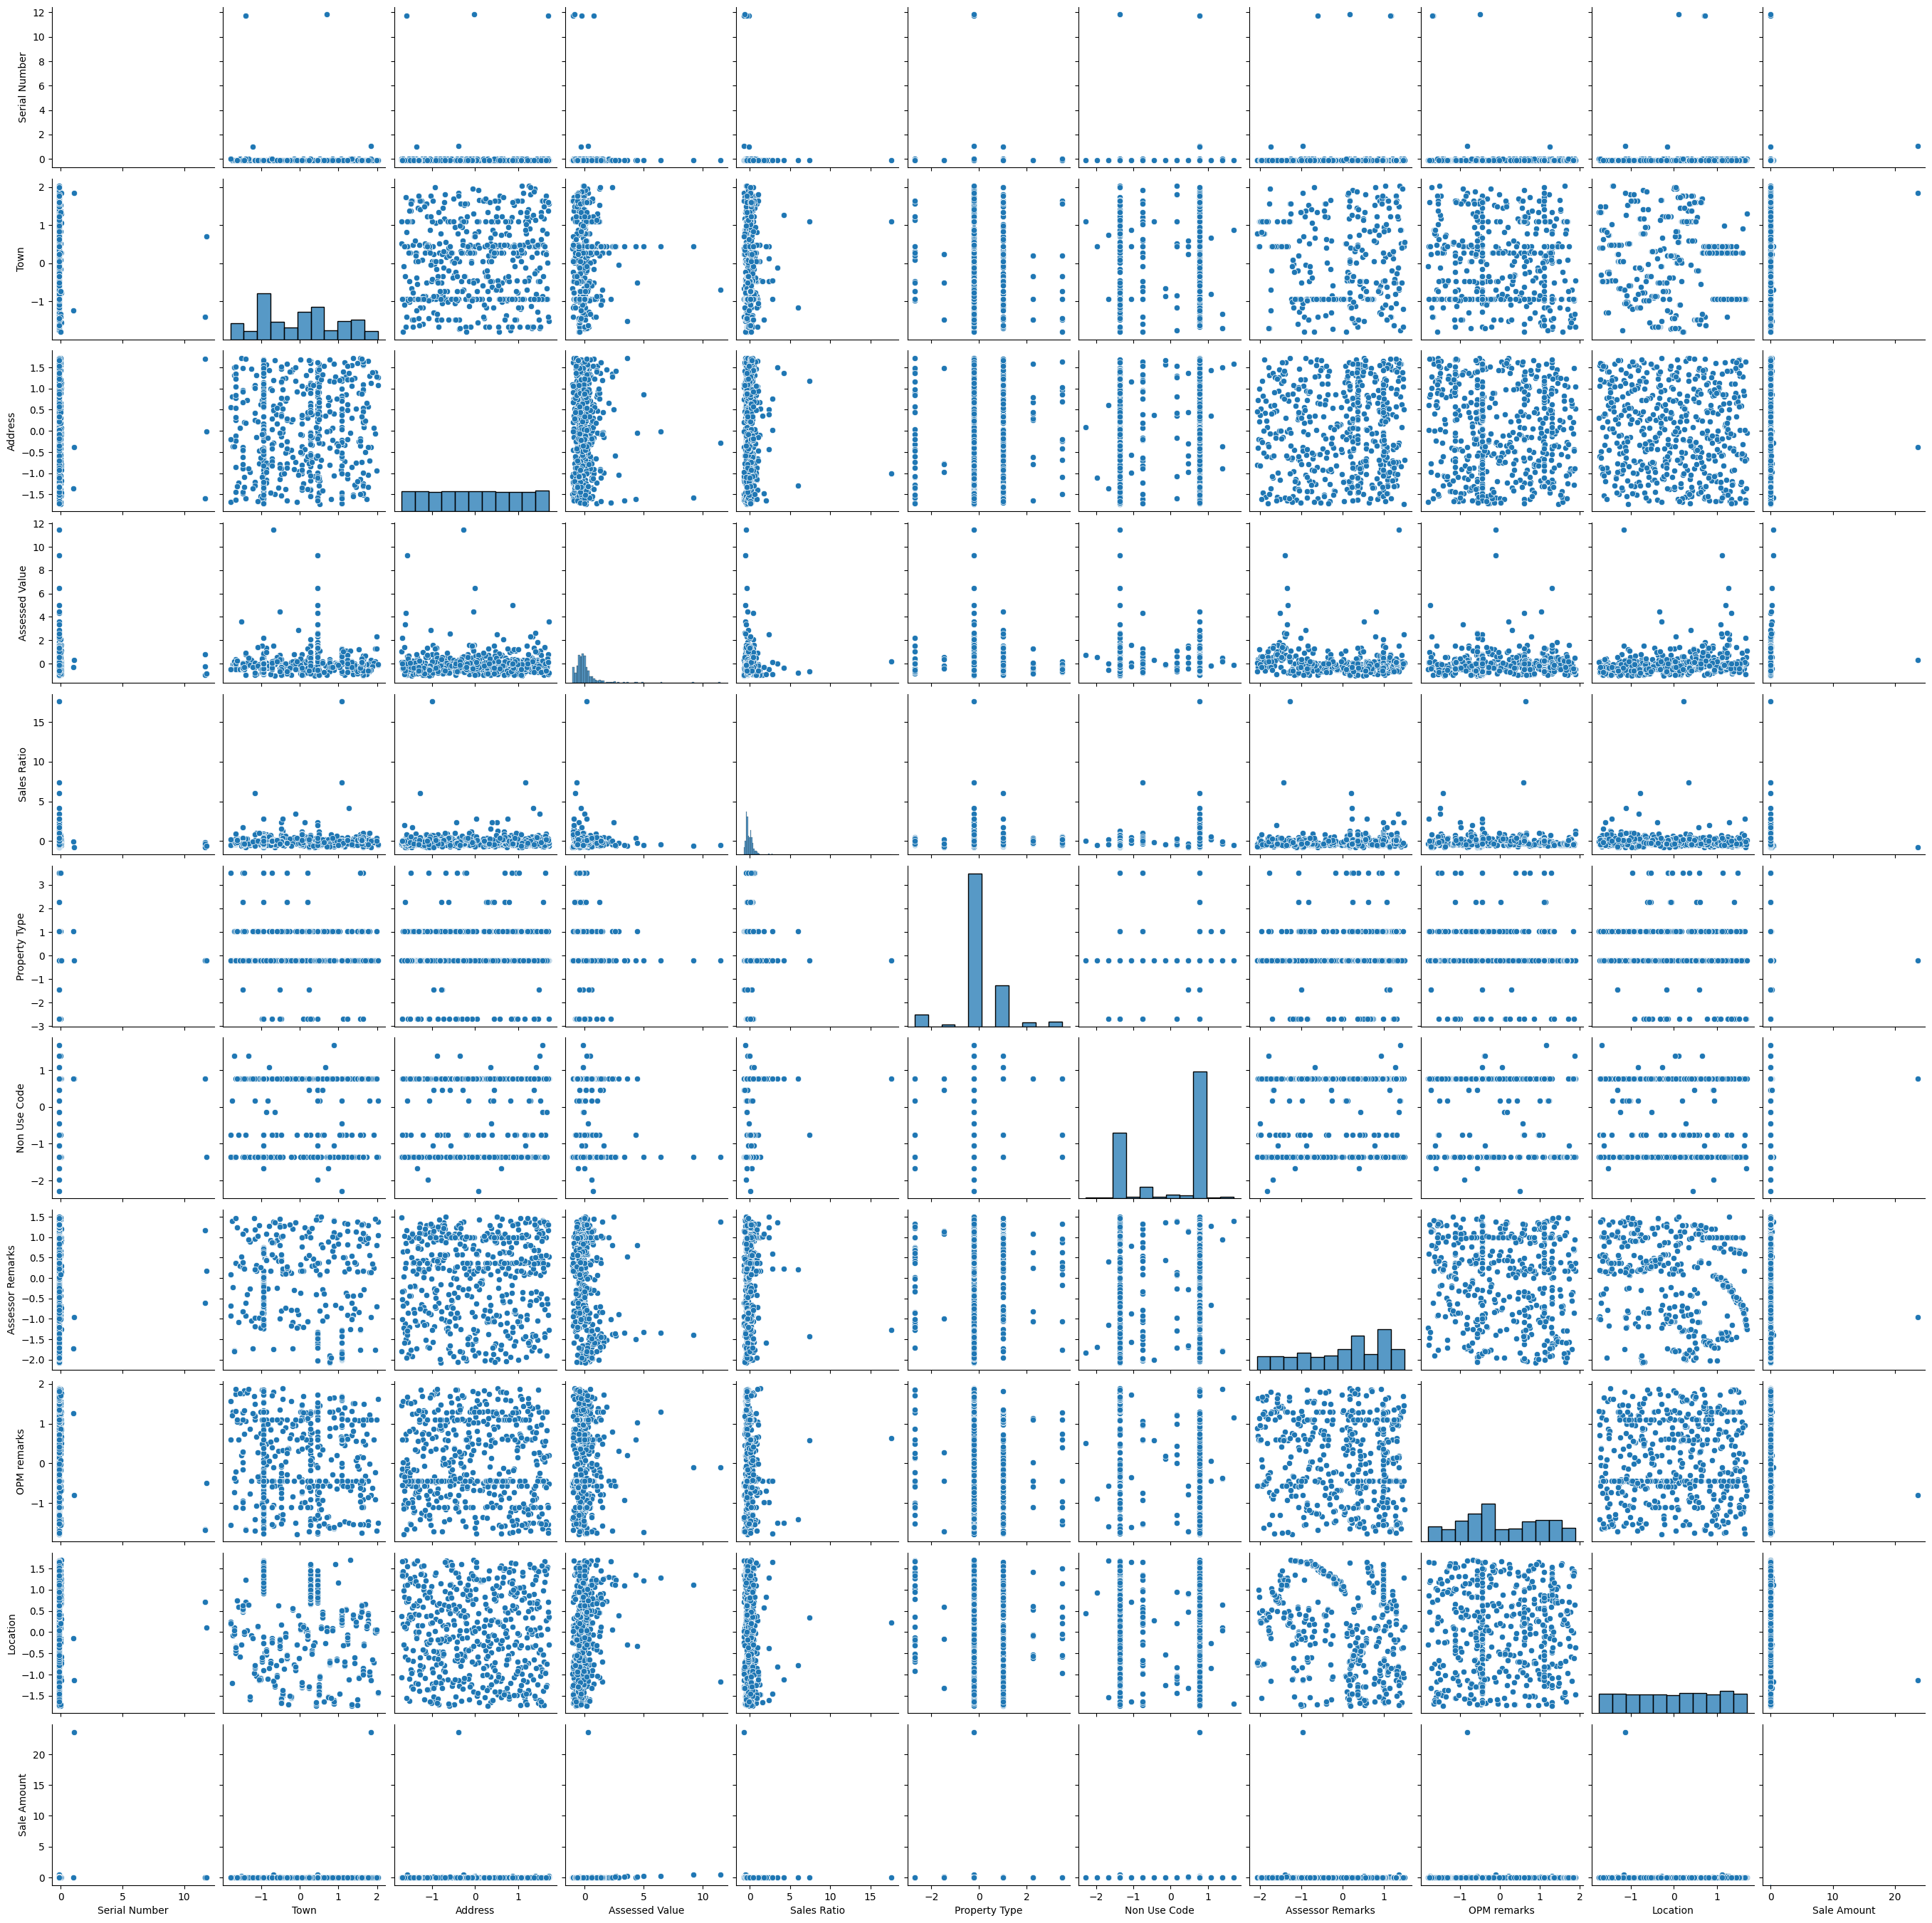

Data preprocessing and EDA completed successfully!


In [28]:
sns.pairplot(data[selected_features.to_list() + [target_col]])
plt.show()

print("Data preprocessing and EDA completed successfully!")


In [31]:
print("Data preprocessing and EDA completed successfully!")

Data preprocessing and EDA completed successfully!


# Display basic information

In [5]:
print("Dataset Information:")
data.info()
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB

Missing Values:
S

# Visualize missing values 

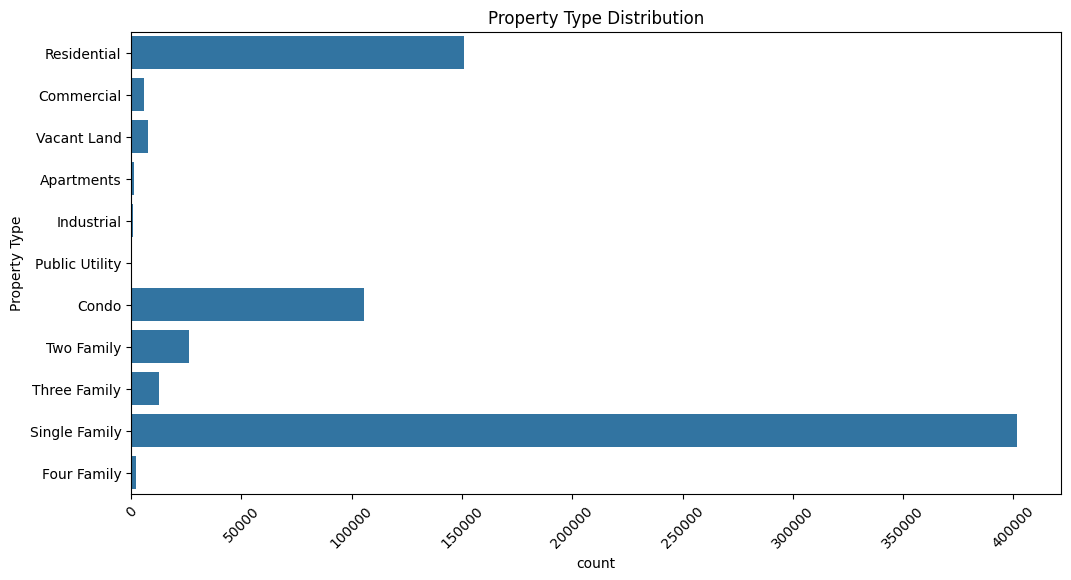

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data['Property Type'])
plt.title("Property Type Distribution")
plt.xticks(rotation=45)
plt.show()


# Visualize target variable distribution

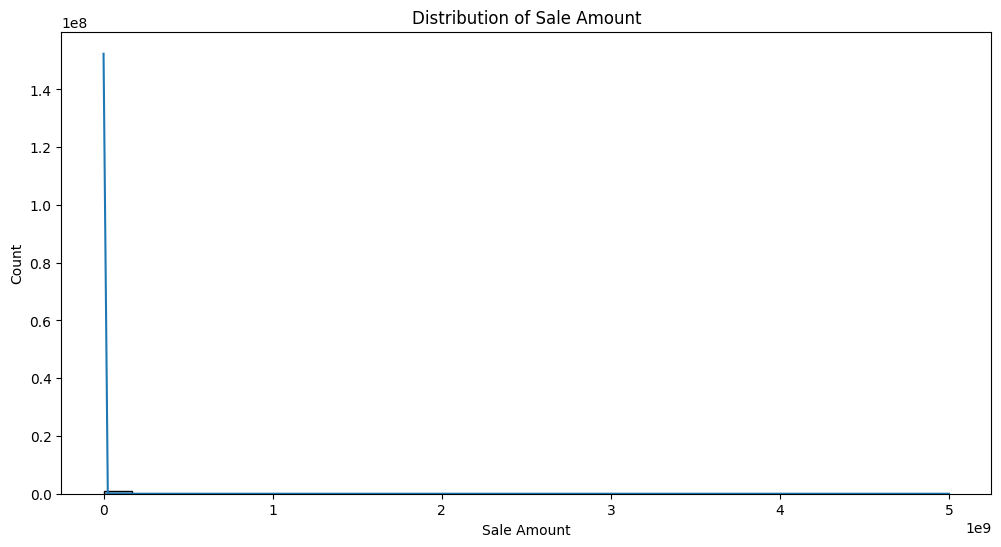

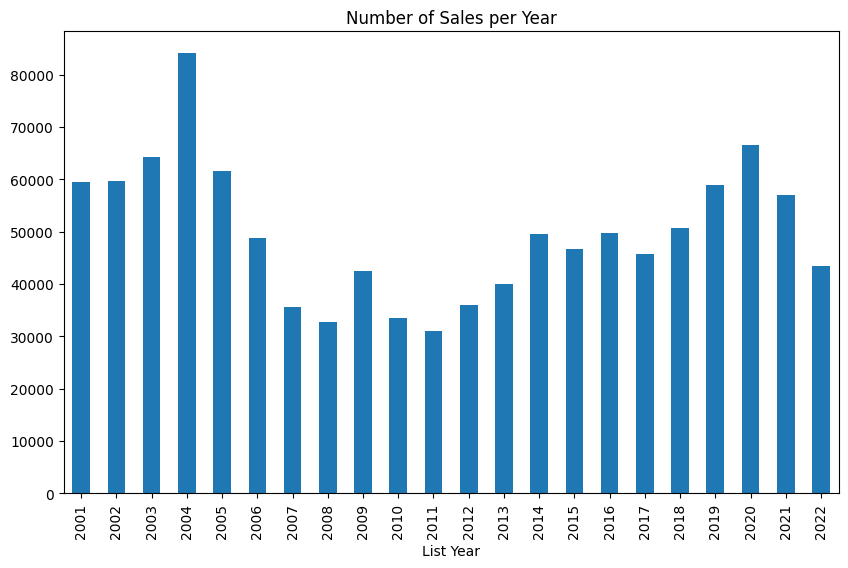

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Sale Amount'], bins=30, kde=True)
plt.title("Distribution of Sale Amount")
plt.show()

plt.figure(figsize=(10, 6))
data['List Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Sales per Year")
plt.show()


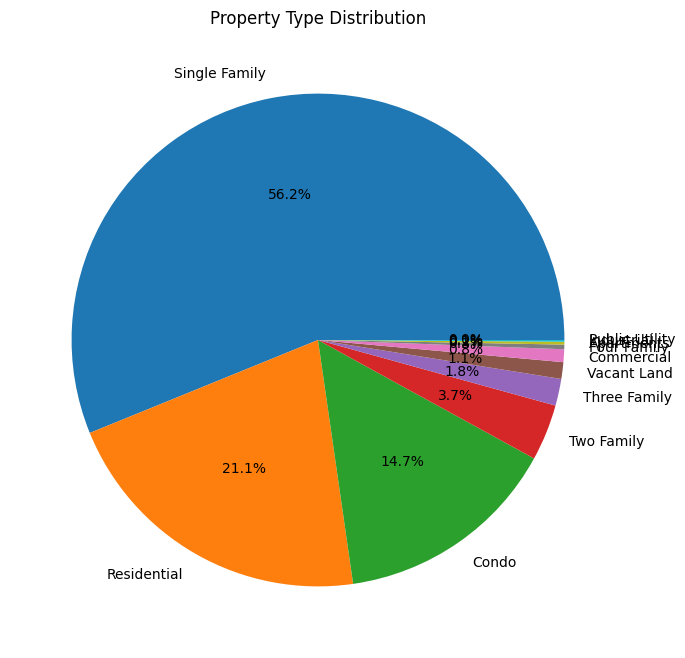

In [11]:
property_type_counts = data['Property Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%')
plt.title("Property Type Distribution")
plt.show()

In [13]:
data = data.drop(columns=['Assessor Remarks', 'OPM remarks', 'Non Use Code', 'Location', 'Address', 'Serial Number'])


In [15]:
data = data.dropna()


In [17]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

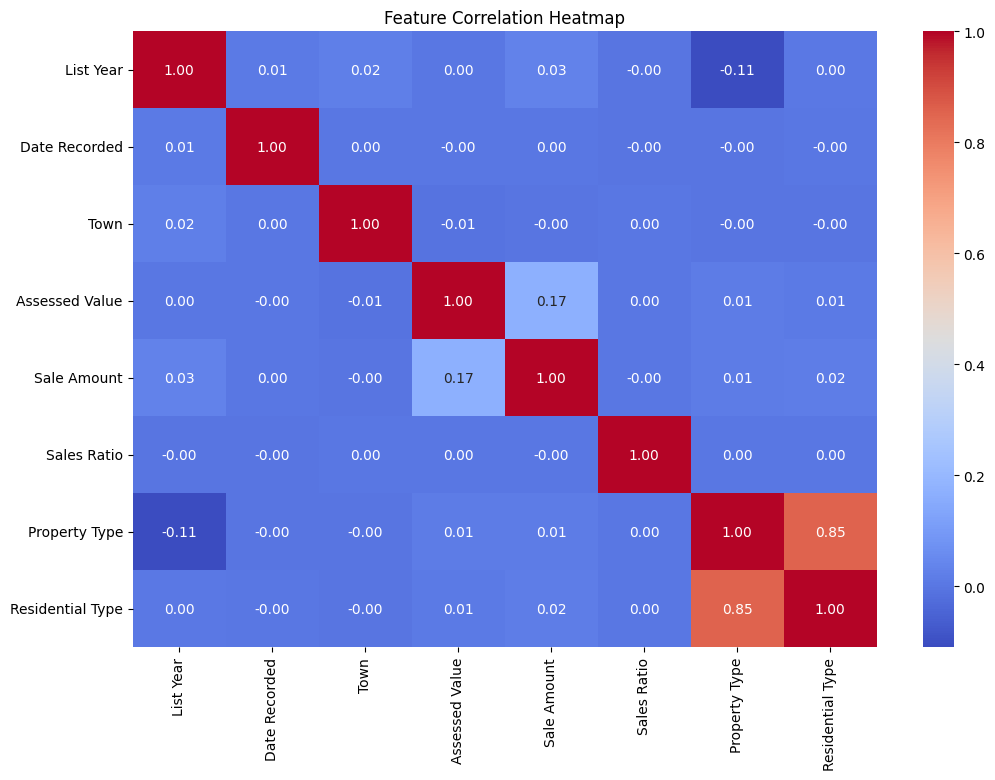

In [19]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
data['Price_per_sqft'] = data['Sale Amount'] / data['Assessed Value']


In [23]:
X = data.drop(columns=['Sale Amount'])
y = data['Sale Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Replace infinite values with NaN
X_train_reg = X_train_reg.replace([np.inf, -np.inf], np.nan)
X_test_reg = X_test_reg.replace([np.inf, -np.inf], np.nan)

# Fill NaN values with column means
X_train_reg = X_train_reg.fillna(X_train_reg.mean())
X_test_reg = X_test_reg.fillna(X_test_reg.mean())

# Scale the cleaned data
scaler = StandardScaler()
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100),
    'XGBoost Regressor': XGBRegressor(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train_scaled_reg, y_train_reg)
    y_pred = model.predict(X_test_scaled_reg)
    print(f"\n{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test_reg, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test_reg, y_pred)}")
    print(f"R2 Score: {r2_score(y_test_reg, y_pred)}")



Linear Regression Performance:
MAE: 245092.6358688353
MSE: 798113297934.7897
R2 Score: 0.044748471954782154

Ridge Performance:
MAE: 245092.66247017015
MSE: 798113352714.3273
R2 Score: 0.044748406389859

Lasso Performance:
MAE: 245092.7645524704
MSE: 798113572304.1835
R2 Score: 0.04474814356558798


In [ ]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100),
    'XGBoost Classifier': XGBClassifier(n_estimators=100)
}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train_class)
    y_pred_class = clf.predict(X_test_scaled)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test_class, y_pred_class))


In [ ]:
best_model = RandomForestRegressor(n_estimators=100)
best_model.fit(X_train_scaled, y_train_resampled)
joblib.dump(best_model, 'best_real_estate_model.pkl')

print("\nModel training and evaluation completed successfully!")


In [8]:
display(data.head())

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN


In [13]:
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()



 # 1. DBMS & SQL Basics 
# Explanation of DBMS, RDBMS, and Basic SQL Concepts
# Creating a sample table for demonstration

In [16]:
cursor.execute('''
    CREATE TABLE Employees (
        EmployeeID INTEGER PRIMARY KEY,
        FirstName TEXT NOT NULL,
        LastName TEXT NOT NULL,
        Department TEXT NOT NULL,
        Salary REAL,
        JoiningDate TEXT
    )
''')


# Inserting sample data

In [18]:
cursor.executemany('''
    INSERT INTO Employees (FirstName, LastName, Department, Salary, JoiningDate) VALUES (?, ?, ?, ?, ?)
''', [
    ('John', 'Doe', 'HR', 60000, '2020-01-15'),
    ('Jane', 'Smith', 'IT', 75000, '2019-06-25'),
    ('Mike', 'Johnson', 'Finance', 80000, '2018-09-18'),
    ('Emily', 'Davis', 'IT', 72000, '2021-03-10')
])
conn.commit()



# Dataset Overview

In [20]:
print("\n### Dataset Overview ###")
df = pd.read_sql_query("SELECT * FROM Employees", conn)
print("Shape of the Dataset:", df.shape)
print("\nStatistical Description:")
print(df.describe())



### Dataset Overview ###
Shape of the Dataset: (4, 6)

Statistical Description:
       EmployeeID   Salary
count    4.000000      4.0
mean     2.500000  71750.0
std      1.290994   8500.0
min      1.000000  60000.0
25%      1.750000  69000.0
50%      2.500000  73500.0
75%      3.250000  76250.0
max      4.000000  80000.0


# Exploratory Data Analysis (EDA)

In [22]:
print("\n### EDA - Checking for Null Values and Data Types ###")
print(df.info())
print("\n### Checking for Unique Values ###")
print(df.nunique())



### EDA - Checking for Null Values and Data Types ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   4 non-null      int64  
 1   FirstName    4 non-null      object 
 2   LastName     4 non-null      object 
 3   Department   4 non-null      object 
 4   Salary       4 non-null      float64
 5   JoiningDate  4 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 324.0+ bytes
None

### Checking for Unique Values ###
EmployeeID     4
FirstName      4
LastName       4
Department     3
Salary         4
JoiningDate    4
dtype: int64


# Skewness Analysis

In [26]:
print("\n### Skewness of Numerical Features Before Correction ###")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].skew())




### Skewness of Numerical Features Before Correction ###
EmployeeID    0.000000
Salary       -1.114187
dtype: float64


# Visualizing Distributions and Outliers

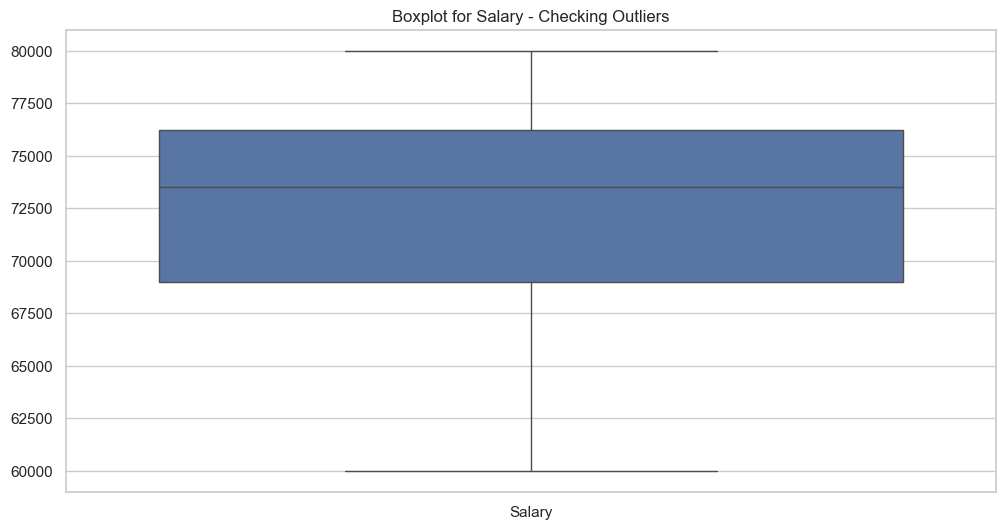

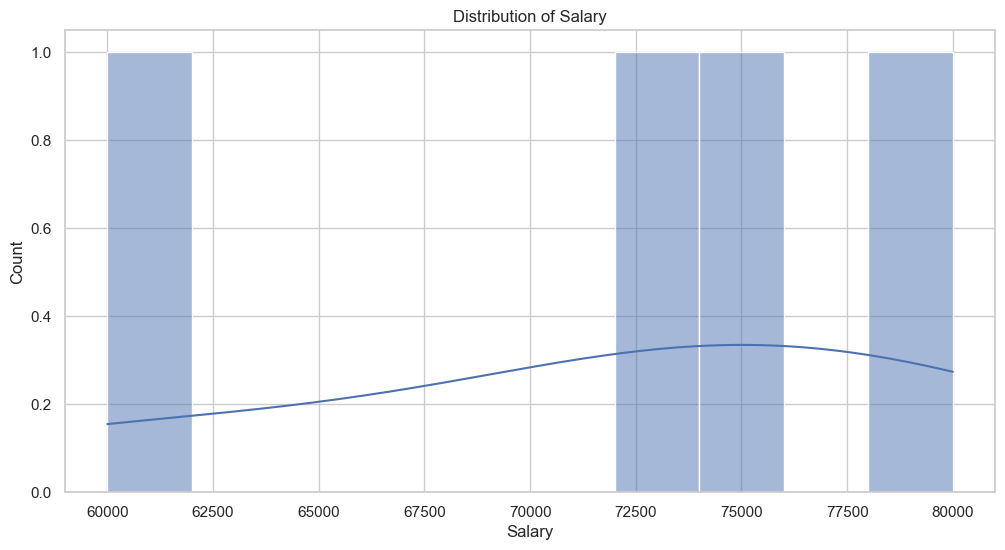

In [28]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Salary']])
plt.title('Boxplot for Salary - Checking Outliers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Salary'], bins=10, kde=True)
plt.title('Distribution of Salary')
plt.show()

# Outlier Correction (Capping Method)


### Outlier Correction - Capping ###

### Outliers have been Capped ###


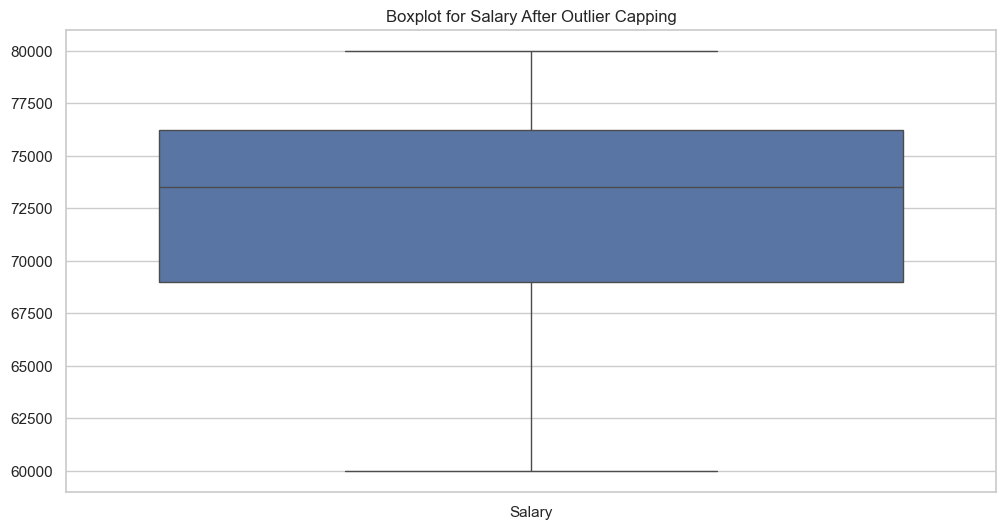

In [30]:
print("\n### Outlier Correction - Capping ###")
q1 = df['Salary'].quantile(0.25)
q3 = df['Salary'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

df['Salary'] = np.where(df['Salary'] < lower_limit, lower_limit, df['Salary'])
df['Salary'] = np.where(df['Salary'] > upper_limit, upper_limit, df['Salary'])

print("\n### Outliers have been Capped ###")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Salary']])
plt.title('Boxplot for Salary After Outlier Capping')
plt.show()

# Updated Dataset Overview

In [32]:
print("\n### Updated Dataset Overview After EDA ###")
print("Shape of the Dataset:", df.shape)
print(df.describe())

display(df)



### Updated Dataset Overview After EDA ###
Shape of the Dataset: (4, 6)
       EmployeeID   Salary
count    4.000000      4.0
mean     2.500000  71750.0
std      1.290994   8500.0
min      1.000000  60000.0
25%      1.750000  69000.0
50%      2.500000  73500.0
75%      3.250000  76250.0
max      4.000000  80000.0


,EmployeeID,FirstName,LastName,Department,Salary,JoiningDate
0,1,John,Doe,HR,60000.0,2020-01-15
1,2,Jane,Smith,IT,75000.0,2019-06-25
2,3,Mike,Johnson,Finance,80000.0,2018-09-18
3,4,Emily,Davis,IT,72000.0,2021-03-10


# Close connection

In [34]:
conn.close()